In [1]:
from __future__ import unicode_literals
import pprint
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import sys
import random
import seaborn as sns
import matplotlib.font_manager as font_manager
sys.path.append('../')
from tools.utils import *
from pytz import timezone
from matplotlib import font_manager, rc

# font setup
font_dirs = ['../']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Times New Roman'

base_path = '../data/'
psn = '00'
date = '20170118'


df = get_kr_oneday_aligned(base_path, psn, date)
df_agg = df

# downsampling due to the figure file size
df_agg['timestamp'] = df_agg['timestamp'].apply(lambda x: x.replace(microsecond=0)).dt.floor('30S')

df_agg = df_agg.groupby('timestamp').mean()
df_agg = df_agg.reset_index()
df_agg['Standby power'] = np.min(df_agg['total'])
df_agg_00 = df_agg


psn = '12'
date = '20161207'
df = get_kr_oneday_aligned(base_path, psn, date)

df_agg = df

# downsampling due to the figure file size
df_agg['timestamp'] = df_agg['timestamp'].apply(lambda x: x.replace(microsecond=0)).dt.floor('30S')

df_agg = df_agg.groupby('timestamp').mean()
df_agg = df_agg.reset_index()
df_agg['Standby power'] = np.min(df_agg['total'])
df_agg_12 = df_agg


/opt/conda/envs/nilmtk-env/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/opt/conda/envs/nilmtk-env/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/opt/conda/envs/nilmtk-env/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


{'TV', 'kimchi-fridge', 'microwave', 'total', 'rice-cooker', 'washing-machine', 'fridge', 'water-purifier'}
{'TV', 'kimchi-fridge', 'microwave', 'total', 'rice-cooker', 'washing-machine', 'fridge', 'water-purifier'}
{'TV', 'kimchi-fridge', 'total', 'rice-cooker', 'washing-machine', 'fridge'}
{'TV', 'kimchi-fridge', 'total', 'rice-cooker', 'washing-machine', 'fridge'}


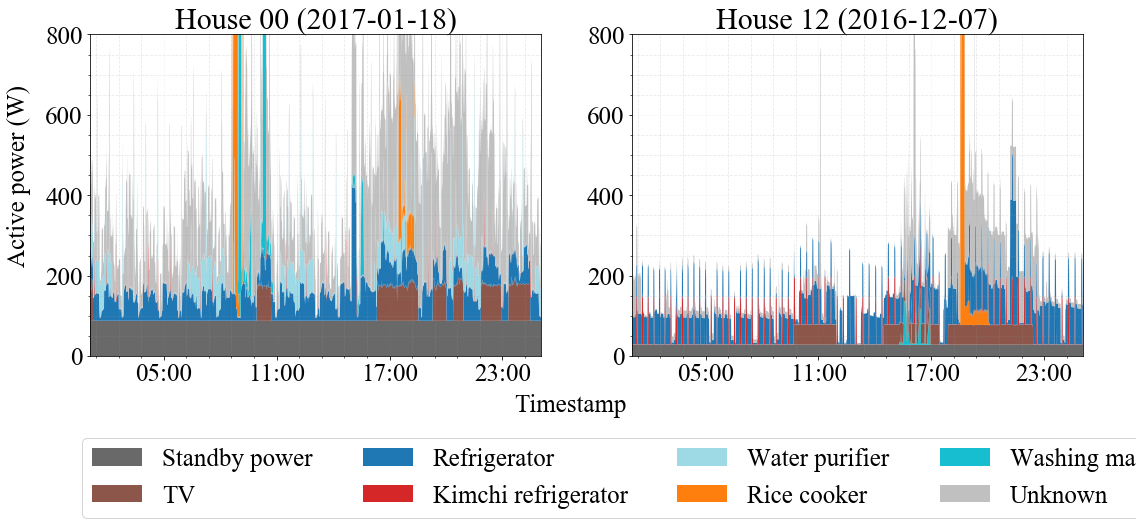

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
overall_fontsize = 25

nice_fonts = {
        "text.usetex": False,
        "axes.labelsize": overall_fontsize,
        "font.size": overall_fontsize,
        "legend.fontsize": overall_fontsize,
        "xtick.labelsize": overall_fontsize,
        "ytick.labelsize": overall_fontsize,
}

mpl.rcParams.update(nice_fonts)

font_dirs = ['../']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['font.family'] = 'Times New Roman'



fig_width = 8.9
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean/2 # height in inches

hours = mdates.HourLocator(interval = 6, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))

app_name_lst = list(df_agg.columns)
app_name_lst.remove('total')

timestamp = [ts.to_pydatetime().replace(tzinfo=timezone('Asia/Seoul')) for ts in df_agg_00['timestamp']]


#plt.figure(figsize = (fig_width, fig_height))
f, (ax1, ax2) = plt.subplots(1,2, sharex=False, sharey=False,
                             figsize = (fig_width*2, fig_height*2.8))

ax1.xaxis.tick_bottom()
ax1.xaxis.set_major_locator(hours)
ax1.xaxis.set_major_formatter(h_fmt)

# House 00
cum = df_agg_00['Standby power']
ax1.fill_between(timestamp, np.zeros(df_agg_00.shape[0]), cum, label = 'Standby power', facecolor='dimgrey')

for app_name in ['TV', 'fridge', 'kimchi-fridge', 'water-purifier',\
                'rice-cooker','washing-machine']:
    lower = cum
    cum = cum + df_agg_00[app_name]
    app_color = get_app_color(app_name)
    ax1.fill_between(timestamp, lower, cum, label = get_pretty_name(app_name), facecolor=app_color)


ax1.fill_between(timestamp, cum, df_agg_00['total'], label = 'Unknown', facecolor = 'silver')
plt.margins(x=0, tight = True)


# House 12
hours = mdates.HourLocator(interval = 6, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))

cum = df_agg_12['Standby power']
timestamp = [ts.to_pydatetime().replace(tzinfo=timezone('Asia/Seoul')) for ts in df_agg_12['timestamp']]

ax2.fill_between(timestamp, np.zeros(df_agg_12.shape[0]), cum, label = 'Standby power', facecolor='dimgrey')

for app_name in ['washing-machine', 'TV', 'rice-cooker', 'kimchi-fridge', 'fridge']:
    lower = cum
    cum = cum + df_agg_12[app_name]
    app_color = get_app_color(app_name)
    ax2.fill_between(timestamp, lower, cum, label = get_pretty_name(app_name), facecolor=app_color)
ax2.fill_between(timestamp, cum, df_agg_12['total'], label = 'Unknown', facecolor = 'silver')



ax2.xaxis.tick_bottom()
ax2.xaxis.set_major_locator(hours)
ax2.xaxis.set_major_formatter(h_fmt)


handles, labels = ax1.get_legend_handles_labels()
lgd = f.legend(handles, labels, loc='lower center',ncol=4, bbox_to_anchor=(0.5, 0.01), borderaxespad=0.)

ax1.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
ax2.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
ax1.minorticks_on()
ax2.minorticks_on()
ax1.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
ax2.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
ax1.set_ylim([0,800])
ax2.set_ylim([0,800])

ax1.set_title('House 00 (2017-01-18)')
ax2.set_title('House 12 (2016-12-07)')
ax1.margins(x=0, tight = True)
ax2.margins(x=0, tight = True)
f.text(0.5, 0.2, 'Timestamp', ha='center')
f.text(0.07, 0.625, 'Active power (W)', ha='center', va='center', rotation='vertical')
f.subplots_adjust(bottom=0.3)


ax1.set_xticks([datetime.datetime(2017,1,17,20,0,0),
                  datetime.datetime(2017,1,18,2,0,0),
                  datetime.datetime(2017,1,18,8,0,0),
               datetime.datetime(2017,1,18,14,0,0)])

ax2.set_xticks([datetime.datetime(2016,12,6,20,0,0),
                  datetime.datetime(2016,12,7,2,0,0),
                  datetime.datetime(2016,12,7,8,0,0),
               datetime.datetime(2016,12,7,14,0,0)])
f.show()
f.savefig('./data_snippet_houses.pdf', bbox_inches='tight', format='pdf', dpi=1000)